Simple Linear Regression  
key points

   # One independent
   # Linear Realtionship
   # Numrical data
   # Interpretability
   # Prediction
   

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df=pd.read_csv('height-weight.csv')
df.head(5)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [9]:
## scatter plot
df.isnull()

,Weight,Height
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Text(0, 0.5, 'Height')

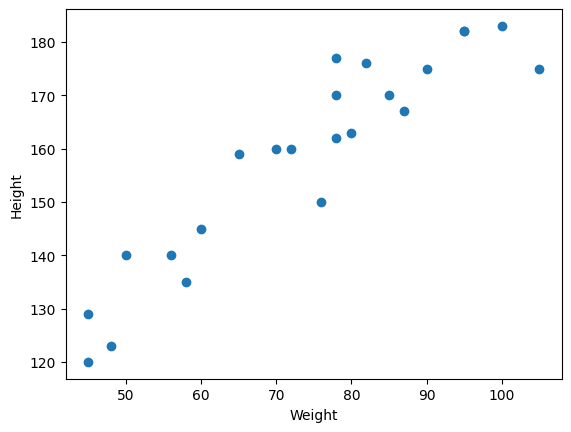

In [10]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

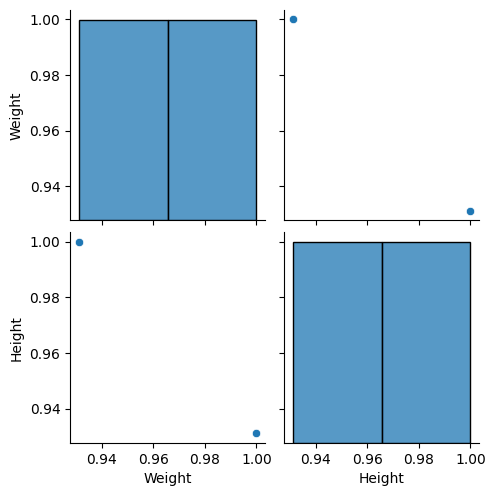

In [11]:
## correleation
df.corr()
sns.pairplot(df.corr())

In [12]:
## independent and dependent features
df.head()
X=df[['Weight']]## should in dataframe or two dimension array
# print(X)
# print(type(X))
np.array(X).shape


y=df['Height']## dependent feature
y.shape

(23,)

In [13]:
## train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
## standardization
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)




In [16]:
X_test=scaler.transform(X_test)
print(X_test)

[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


In [17]:
## apply SLR
from sklearn.linear_model import LinearRegression


In [18]:
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)
print(regression)

LinearRegression(n_jobs=-1)


In [19]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [20]:
print("Coeffienct or slope:",regression.coef_)
print("Interrupte:",regression.intercept_)

Coeffienct or slope: [17.2982057]
Interrupte: 156.47058823529412


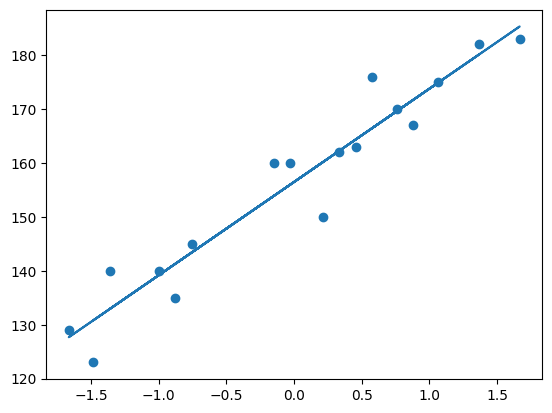

In [21]:
## plot Training data plat best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train)) ## best fit line

In [22]:
## predication for test data
y_pred=regression.predict(X_test)



In [23]:
## perfomance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)
rmse=np.sqrt(mse)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [24]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [25]:
## OLS method
import statsmodels.api as sm

In [26]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [27]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 18 Jun 2025   Prob (F-statistic):                       0.664
Time:                        19:04:42   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\ML\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


## prediation for new data
regression.predict(scaler.transform([[73]]))

In [33]:
regression.predict(scaler.transform([[70]]))

d:\ML\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.88159699])

In [31]:
model.predict([[67]])

array([1158.97978219])